In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
import scipy.stats as stats
import random
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm

## 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

## Note: 
* Perform all the Statistical analysis with 5% (Significance level).
* Assume all the features are normally distributed and have equal variance.


In [3]:
data= pd.read_csv('fifa_stats.csv')
data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

### a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [10]:
samp= random.sample(sorted(data['Age']), k=200)

In [17]:
n=len(samp)
xbar= np.mean(samp)
sampsd= np.std(samp, ddof=1)
se= sampsd/np.sqrt(n)
print('Standard Error:', se)
print('Sample Mean:', xbar)

Standard Error: 0.2772296546313817
Sample Mean: 26.84


In [18]:
mew= data['Age'].mean()
popsd= data['Age'].std()
print('Population Mean:', mew)
print('Population SD:', popsd)

Population Mean: 27.2315
Population SD: 3.8590612753574423


The sample mean and population mean are close to each other because the sample size that we have chosen is sufficiently large enough and that's why the standard error is close to zero. 

Standard error decreases with increase in sample size becoz the sample is going more and more close to the population and at a certain point it will resemble all the characteristics of a population.

### b) Is there any evidence that the players overall rating is greater than 80?

The null and alternate hypothesis are:
* Ho: The players overall rating <=80.
* Ha: The players overall rating >80. (right tale test)

we will perform one sample ttest.

In [53]:
stats.ttest_1samp(data['Overall_rating'], popmean=80, alternative= 'greater')

Ttest_1sampResult(statistic=-24.538460498672062, pvalue=1.0)

Since the pvalue is greater than 95, we reject the null hypothesis and conclude that the players overall rating is greater than 80.

### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

The null and alternate hypothesis are:

* Ho: The preferred foot don't have an impact on potential.
* Ha: The preferred foot has an impact on potential.

In [42]:
data['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [44]:
samp1= data[data['Preferred Foot']=='Left']['Potential']
samp2= data[data['Preferred Foot']=='Right']['Potential']

In [46]:
stats.f_oneway(samp1, samp2)

F_onewayResult(statistic=2.3648403497065615, pvalue=0.12425494914458383)

since pvalue is greater than alpha(0.05), we fail to reject the Ho, and conclude that the preferred foot don't have an impact on potential.

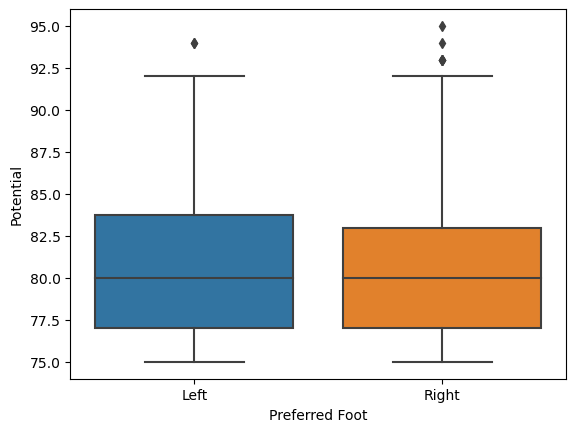

In [55]:
# Graphical Analysis
sns.boxplot(x= data['Preferred Foot'], y= data['Potential'])
plt.show()

Here also, it is evident that left and right foot both have same variation with potential that is preferrence in foot does not affect the potential of a player.

### d)	Perform the statistical test to identify the relation between the overall rating and potential. Assume both are continuous data points.

The null and alternate hypothesis are:

* Ho: There is no significant linear relationship between Overall rating and potential.
* Ha: There is significant linear relationship between overall rating and potential

Since we have to find the correlation between two continuous variable, we will perform pearson's Correlation Coefficient Test.

In [60]:
stats.pearsonr(data['Overall_rating'], data['Potential'], alternative='two-sided')

PearsonRResult(statistic=0.7326945574179985, pvalue=0.0)

since the pvalue is less than alpha, we reject the null hypothesis and conclude that there is a relation and from the test statistic we can say that there is a positive correlation between overall rating and potential.

### e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

The null and alternate hypothesis are:

* Ho: The skill move don't have an impact on overall rating.
* Ha: The skill move have an impact on overall rating.

Since we have to check effect of a category on a number, we will perform one way anova test.

In [62]:
data['Skill Moves'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [77]:
val= {1:'Low Skills', 2: 'Some Skills', 3:'Good Skills', 4: 'Very Good Skills', 5: 'Excellent Skills'}

In [78]:
data['Skill Moves']= data['Skill Moves'].map(val).astype('object')
data['Skill Moves']

0       Very Good Skills
1       Excellent Skills
2       Excellent Skills
3             Low Skills
4       Very Good Skills
              ...       
1995    Very Good Skills
1996         Some Skills
1997    Very Good Skills
1998    Excellent Skills
1999         Some Skills
Name: Skill Moves, Length: 2000, dtype: object

In [79]:
samp1= data[data['Skill Moves']=='Low Skills']['Overall_rating']
samp2= data[data['Skill Moves']=='Some Skills']['Overall_rating']
samp3= data[data['Skill Moves']=='Good Skills']['Overall_rating']
samp4= data[data['Skill Moves']=='Very Good Skills']['Overall_rating']
samp5= data[data['Skill Moves']=='Excellent Skills']['Overall_rating']

In [80]:
stats.f_oneway(samp1, samp2, samp3, samp4, samp5)

F_onewayResult(statistic=31.085141826531746, pvalue=3.8236370526660514e-25)

since the pvalue is less than alpha(0.05), we reject the null hypothesis and conclude that at least two category has an impact on overall rating and we will perform post hoc test to find how many have categories have an impact on overall rating.

In [86]:
print(pairwise_tukeyhsd( data['Overall_rating'], data['Skill Moves'], alpha=0.05))

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
Excellent Skills      Good Skills  -4.6813    0.0  -6.109 -3.2536   True
Excellent Skills       Low Skills  -3.4937    0.0 -5.0227 -1.9646   True
Excellent Skills      Some Skills   -4.208    0.0 -5.6705 -2.7455   True
Excellent Skills Very Good Skills  -3.4036    0.0 -4.8479 -1.9592   True
     Good Skills       Low Skills   1.1876    0.0  0.4926  1.8826   True
     Good Skills      Some Skills   0.4733  0.109 -0.0595  1.0061  False
     Good Skills Very Good Skills   1.2777    0.0  0.7968  1.7586   True
      Low Skills      Some Skills  -0.7143 0.0797 -1.4782  0.0496  False
      Low Skills Very Good Skills   0.0901 0.9972 -0.6385  0.8187  False
     Some Skills Very Good Skills   0.8044 0.0013  0.2284  1.3804   True
---------------------------------------------------

All combinations except good skills and some skills, low skills and some skills & low skills and very good skills don't have an impact on overall rating.

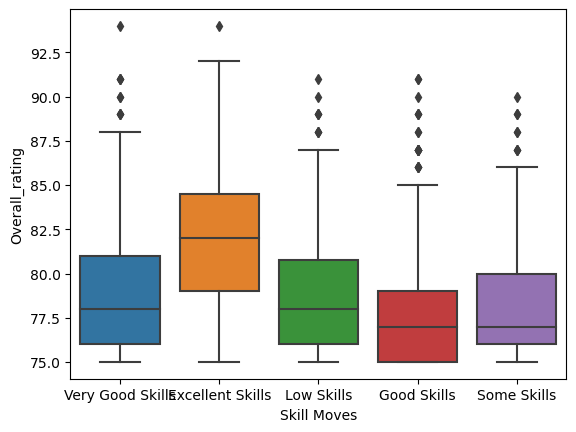

In [89]:
sns.boxplot(x=data['Skill Moves'], y=data['Overall_rating'])
plt.show()

It is also evident from above graph that various skill moves has an impact on overall rating.

## 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

## Note: 
* Perform all the Statistical analysis with 5% (Significance level).
* Assume all the features are normally distributed and have equal variance.

In [138]:
phone= pd.read_csv('phone.csv')
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [90]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


### a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results

In [95]:
xbar= phone['duration'].mean()
sampsd= phone['duration'].std(ddof=1)
n= len(phone['duration'])

se= sampsd/np.sqrt(n)

In [103]:
interval95 = stats.norm.interval(0.95, loc= xbar, scale= se)
print('Interval at 95% confidence:', np.round(interval95,2))

Interval at 95% confidence: [141.18 147.43]


In [105]:
interval99 = stats.norm.interval(0.99, loc= xbar, scale= se)
print('Interval at 99% confidence:', np.round(interval99,2))

Interval at 99% confidence: [140.2  148.41]


The confidence interval at 99 is more wider since we are more confident that the average duration of the calls made by the entire network will fall in (140.20 - 148.41) range. 

### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

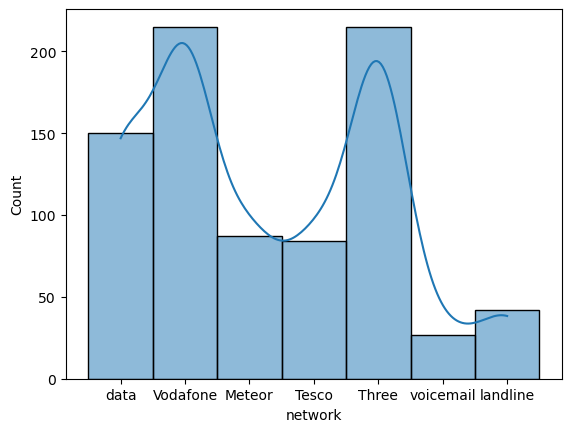

In [129]:
sns.histplot(phone['network'], kde= True)
plt.show()

The networks are not equally distributed in the data, the highest count is of vodafone and three and the least is voicemail.

### c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.


<AxesSubplot:xlabel='network', ylabel='duration'>

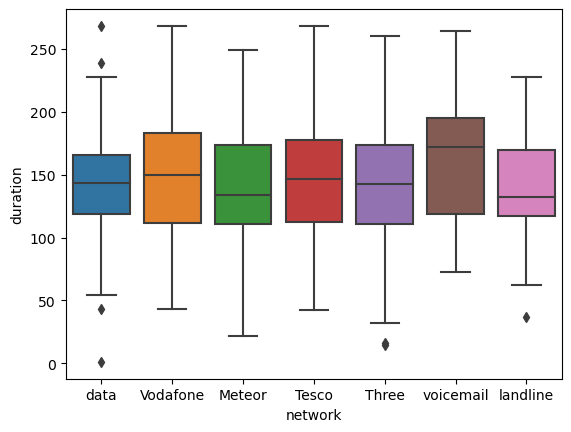

In [132]:
sns.boxplot(x= phone['network'], y= phone['duration'])

According to the data, on an average people communicated on the voicemail for the maximum duration while people talked on the landline for a lesser amount of time and the network on which the duration was the least is meteor.

### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

The null and alternate hypothesis are:

* Ho: The Item and Duration are not related
* Ha: The Item and Duration have a relation.

Since we have to check relation between a category and a number, we will perform one way anova test.

In [134]:
phone['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [135]:
samp1= phone[phone['item']=='data']['duration']
samp2= phone[phone['item']=='call']['duration']
samp3= phone[phone['item']=='sms']['duration']

In [136]:
stats.f_oneway(samp1, samp2, samp3)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

Since the pvalue is greater than alpha(0.05), we fail to reject the null hypothesis and conclude that the item and duration don't have a relation with each other.

### e)	Perform statistical tests to identify the relation between network and network_type. 

The null and alternate hypothesis are:

* Ho: The network and network type are not related/dependent.
* Ha: The network and network type have a relation/dependent.

Since we have to check relation between two categories, we will perform chisquare contingency test.

In [144]:
table= pd.crosstab(index= phone['network'], columns= phone['network_type'])
table

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [148]:
test_stat, pvalue, dof, expected_value= stats.chi2_contingency(observed= table, correction= False)

print("Test statistic:", test_stat)
print("p-value:", pvalue)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 2460.0
p-value: 0.0
Degrees of freedom: 18
Expected values: [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]


Since the pvalue is less than alpha, we reject the null hypothesis and conclude that the network and network type are dependent on each other.